In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('unsw_egitim.csv')

df.drop("service", axis='columns')
df.drop("proto", axis='columns')
df.drop("state", axis='columns')
df.drop("attack_cat", axis='columns')
l2 = LabelEncoder()
label1 = l2.fit_transform(df['service'])
df["service"] = label1
label2 = l2.fit_transform(df['proto'])
df["proto"] = label2
label3 = l2.fit_transform(df['state'])
df["state"] = label3
label4 = l2.fit_transform(df['attack_cat'])
df["attack_cat"] = label4
Egitim = df
Egitim.pop("id")
print(Egitim)

             dur  proto  service  ...  is_sm_ips_ports  attack_cat  label
0       0.121478    113        0  ...                0           6      0
1       0.649902    113        0  ...                0           6      0
2       1.623129    113        0  ...                0           6      0
3       1.681642    113        3  ...                0           6      0
4       0.449454    113        0  ...                0           6      0
...          ...    ...      ...  ...              ...         ...    ...
175336  0.000009    119        2  ...                0           5      1
175337  0.505762    113        0  ...                0           8      1
175338  0.000009    119        2  ...                0           5      1
175339  0.000009    119        2  ...                0           5      1
175340  0.000009    119        2  ...                0           5      1

[175341 rows x 44 columns]


In [41]:
veri = Egitim.values
X = veri[:,0:43]
Y = veri[:,43]

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state = 0)

In [43]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(x_train)
x_train_norm = minMaxScaler.transform(x_train)
x_test_norm = minMaxScaler.transform(x_test)

In [44]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
y_pred = model.fit(x_train, y_train).predict(x_test)


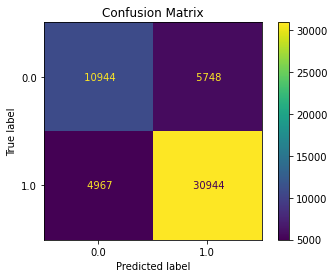

Sensitivity :  0.6556434219985622
Specificity :  0.8616858344239926
Accuracy :  0.796304393285554


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt  
matrix = plot_confusion_matrix(model, x_test, y_test,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
cm = confusion_matrix(y_test, y_pred)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ',acc)

In [46]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
y_pred = model.fit(x_train_norm, y_train).predict(x_test_norm)

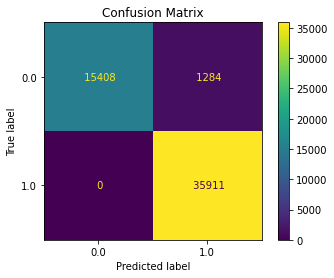

Sensitivity :  0.9230769230769231
Specificity :  1.0
Accuracy :  0.9755907457749557


In [47]:
matrix = plot_confusion_matrix(model, x_test_norm, y_test,values_format=" ")
matrix.ax_.set_title("Confusion Matrix", color="black")
plt.show()  
cm = confusion_matrix(y_test, y_pred)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ',sensitivity1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ',acc)